In [94]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Preprocessing the raw data

In [95]:
# iterate over all WASDE csv files in the data folder and vertically concatenate them
path = 'data collection/WASDE data/*/*.csv'
all_files = glob.glob(path)
df_from_each_file = (pd.read_csv(f, low_memory=False) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
print(concatenated_df.shape)
concatenated_df.head()

(832923, 16)


,WasdeNumber,ReportDate,ReportTitle,Attribute,ReliabilityProjection,Commodity,Region,MarketYear,ProjEstFlag,AnnualQuarterFlag,Value,Unit,ReleaseDate,ReleaseTime,ForecastYear,ForecastMonth
0,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Beginning stocks,NaN,Sugar,Mexico,2008/09,Est.,Annual,1975.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
1,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Domestic,NaN,Sugar,Mexico,2008/09,Est.,Annual,5540.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
2,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Ending Stocks,NaN,Sugar,Mexico,2008/09,Est.,Annual,488.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
3,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Exports,NaN,Sugar,Mexico,2008/09,Est.,Annual,1367.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
4,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Imports,NaN,Sugar,Mexico,2008/09,Est.,Annual,160.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4


In [96]:
concatenated_df

,WasdeNumber,ReportDate,ReportTitle,Attribute,ReliabilityProjection,Commodity,Region,MarketYear,ProjEstFlag,AnnualQuarterFlag,Value,Unit,ReleaseDate,ReleaseTime,ForecastYear,ForecastMonth
0,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Beginning stocks,NaN,Sugar,Mexico,2008/09,Est.,Annual,1975.00,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
1,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Domestic,NaN,Sugar,Mexico,2008/09,Est.,Annual,5540.00,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
2,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Ending Stocks,NaN,Sugar,Mexico,2008/09,Est.,Annual,488.00,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
3,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Exports,NaN,Sugar,Mexico,2008/09,Est.,Annual,1367.00,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
4,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Imports,NaN,Sugar,Mexico,2008/09,Est.,Annual,160.00,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832918,650,July 2024,World Wheat Supply and Use,Domestic Total,NaN,Wheat,World Less China,2024/25,Proj.,Annual,648.94,Million Metric Tons,2024-07-12,12:00:00.0000000,2024,7
832919,650,July 2024,World Wheat Supply and Use,Ending Stocks,NaN,Wheat,World Less China,2024/25,Proj.,Annual,122.73,Million Metric Tons,2024-07-12,12:00:00.0000000,2024,7
832920,650,July 2024,World Wheat Supply and Use,Exports,NaN,Wheat,World Less China,2024/25,Proj.,Annual,211.99,Million Metric Tons,2024-07-12,12:00:00.0000000,2024,7
832921,650,July 2024,World Wheat Supply and Use,Imports,NaN,Wheat,World Less China,2024/25,Proj.,Annual,194.70,Million Metric Tons,2024-07-12,12:00:00.0000000,2024,7


In [97]:
crude_oil_df = pd.read_csv('data collection/Crude Oil WTI Futures Historical Data - daily data 10 years.csv')
gold_df = pd.read_csv('data collection/Gold Futures Historical Data - daily data 10 years.csv')
sp500_df = pd.read_csv('data collection/S&P 500 Historical Data - daily data 10 years.csv')
silver_df = pd.read_csv('data collection/Silver Futures Historical Data - daily data 10 years.csv')
corn_df = pd.read_csv('data collection/US Corn Futures Historical Data - daily data 10 years.csv')
dollar_rate_df = pd.read_csv('data collection/US Dollar Index Historical Data - daily data 10 years.csv')
soybean_df = pd.read_csv('data collection/US Soybeans Futures Historical Data - daily data 10 years.csv')

dfs_dict = {
    'crude_oil_df': crude_oil_df,
    #'food_price_df': food_price_df,
    'gold_df': gold_df,
    'sp500_df': sp500_df,
    'silver_df': silver_df,
    'corn_df': corn_df,
    'dollar_rate_df': dollar_rate_df,
    'soybean_df': soybean_df
}

In [98]:
dfs_dict

{'crude_oil_df':             Date  Price   Open   High    Low     Vol. Change %
 0     07/29/2024  75.56  77.28  77.69  75.52      NaN   -2.21%
 1     07/28/2024  77.27  77.47  77.48  77.22      NaN    0.14%
 2     07/26/2024  77.16  78.35  78.60  76.19  365.12K   -1.43%
 3     07/25/2024  78.28  77.50  78.47  76.04  457.29K    0.89%
 4     07/24/2024  77.59  77.45  78.19  76.98  355.97K    0.82%
 ...          ...    ...    ...    ...    ...      ...      ...
 3039  01/08/2013  93.15  93.32  93.80  92.67  195.87K   -0.04%
 3040  01/07/2013  93.19  93.21  93.35  92.42  166.29K    0.11%
 3041  01/04/2013  93.09  92.86  93.21  91.52  210.75K    0.18%
 3042  01/03/2013  92.92  92.91  93.30  92.49  189.81K   -0.21%
 3043  01/02/2013  93.12  91.78  93.87  91.56  203.87K    1.42%
 
 [3044 rows x 7 columns],
 'gold_df':             Date     Price      Open      High       Low     Vol. Change %
 0     07/29/2024  2,435.05  2,443.30  2,448.40  2,430.65      NaN   -0.33%
 1     07/28/2024  2,443.

In [99]:
cpi_df = pd.read_csv('data collection/Customer Price Index.csv')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'], format='%Y-%m-%d')
cpi_df = cpi_df[cpi_df['DATE'] >= '2013-01']
cpi_df.rename(columns={'CPIAUCSL':'CPI'}, inplace=True)
cpi_df

,DATE,CPI
792,2013-01-01,231.679
793,2013-02-01,232.937
794,2013-03-01,232.282
795,2013-04-01,231.797
796,2013-05-01,231.893
...,...,...
925,2024-02-01,311.054
926,2024-03-01,312.230
927,2024-04-01,313.207
928,2024-05-01,313.225


In [100]:
ppi_df = pd.read_csv('data collection/Producer Price Index.csv')
ppi_df['DATE'] = pd.to_datetime(ppi_df['DATE'], format='%Y-%m-%d')
ppi_df.rename(columns={'PPIACO':'PPI'}, inplace=True)
ppi_df

,DATE,PPI
0,2013-01-01,202.500
1,2013-02-01,204.300
2,2013-03-01,204.000
3,2013-04-01,203.500
4,2013-05-01,204.100
...,...,...
133,2024-02-01,254.926
134,2024-03-01,254.963
135,2024-04-01,256.772
136,2024-05-01,255.094


In [101]:
# Identify and drop columns that start with "Unnamed"
food_price_df = pd.read_csv('data collection/Food_price_indices_data_jul.csv')
food_price_df = food_price_df.loc[:, ~food_price_df.columns.str.startswith('Unnamed')]
food_price_df['Date'] = pd.to_datetime(food_price_df['Date'], format='%Y-%m')

# Filter rows starting from January 2013
filtered_foodprice_df = food_price_df[food_price_df['Date'] >= '2013-01']
filtered_foodprice_df['Date'] = filtered_foodprice_df['Date'].dt.strftime('%Y-%m')
rename_dict = {
    'Meat': 'Meat FP Index',
    'Dairy': 'Dairy FP Index',
    'Cereals': 'Cereals FP Index',
    'Oils': 'Oils FP Index',
    'Sugar': 'Sugar FP Index'
}
# Rename columns
filtered_foodprice_df.rename(columns=rename_dict, inplace=True)
# Display the filtered DataFrame
print(filtered_foodprice_df)

        Date  Food Price Index  Meat FP Index  Dairy FP Index   
276  2013-01             123.4          106.5           121.0  \
277  2013-02             123.3          107.6           123.8   
278  2013-03             122.9          108.0           128.0   
279  2013-04             122.9          108.7           140.8   
280  2013-05             122.1          105.5           140.0   
..       ...               ...            ...             ...   
409  2024-02             117.4          112.5           120.7   
410  2024-03             119.0          115.0           124.0   
411  2024-04             119.3          116.7           123.8   
412  2024-05             120.6          117.0           126.3   
413  2024-06             120.6          116.9           127.8   

     Cereals FP Index  Oils FP Index  Sugar FP Index  
276             145.2         124.28           116.8  
277             142.3         125.55           113.0  
278             139.9         122.38           114.3  

C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\1875306611.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_foodprice_df['Date'] = filtered_foodprice_df['Date'].dt.strftime('%Y-%m')
C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\1875306611.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_foodprice_df.rename(columns=rename_dict, inplace=True)


In [102]:
print(type(crude_oil_df["Date"][1]))
crude_oil_df

<class 'str'>


,Date,Price,Open,High,Low,Vol.,Change %
0,07/29/2024,75.56,77.28,77.69,75.52,NaN,-2.21%
1,07/28/2024,77.27,77.47,77.48,77.22,NaN,0.14%
2,07/26/2024,77.16,78.35,78.60,76.19,365.12K,-1.43%
3,07/25/2024,78.28,77.50,78.47,76.04,457.29K,0.89%
4,07/24/2024,77.59,77.45,78.19,76.98,355.97K,0.82%
...,...,...,...,...,...,...,...
3039,01/08/2013,93.15,93.32,93.80,92.67,195.87K,-0.04%
3040,01/07/2013,93.19,93.21,93.35,92.42,166.29K,0.11%
3041,01/04/2013,93.09,92.86,93.21,91.52,210.75K,0.18%
3042,01/03/2013,92.92,92.91,93.30,92.49,189.81K,-0.21%


Overview of crude_oil_df:
            Date  Price   Open   High    Low      Vol.  Change %
0     07/29/2024  75.56  77.28  77.69  75.52       NaN     -2.21
1     07/28/2024  77.27  77.47  77.48  77.22       NaN      0.14
2     07/26/2024  77.16  78.35  78.60  76.19  365120.0     -1.43
3     07/25/2024  78.28  77.50  78.47  76.04  457290.0      0.89
4     07/24/2024  77.59  77.45  78.19  76.98  355970.0      0.82
...          ...    ...    ...    ...    ...       ...       ...
3039  01/08/2013  93.15  93.32  93.80  92.67  195870.0     -0.04
3040  01/07/2013  93.19  93.21  93.35  92.42  166290.0      0.11
3041  01/04/2013  93.09  92.86  93.21  91.52  210750.0      0.18
3042  01/03/2013  92.92  92.91  93.30  92.49  189810.0     -0.21
3043  01/02/2013  93.12  91.78  93.87  91.56  203870.0      1.42

[3044 rows x 7 columns]


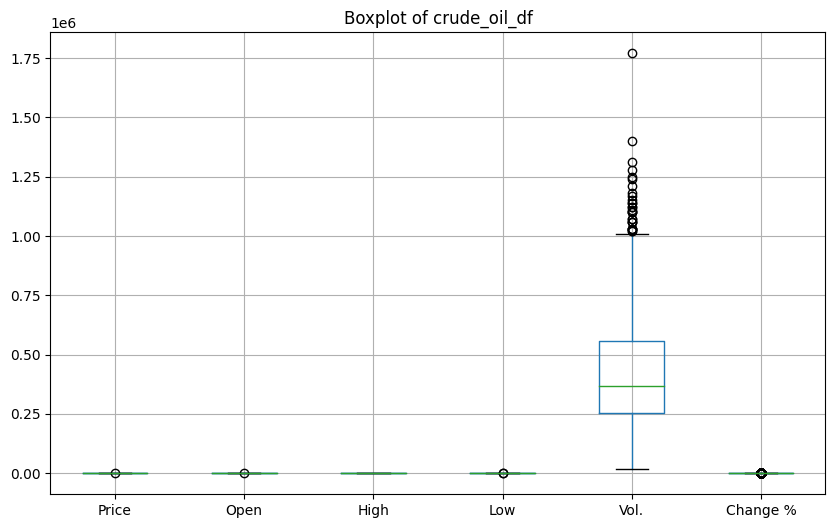

Overview of gold_df:
            Date    Price     Open    High      Low      Vol.  Change %
0     07/29/2024  2435.05  2443.30  2448.4  2430.65       NaN     -0.33
1     07/28/2024  2443.05  2433.55  2449.2  2432.45       NaN      0.62
2     07/26/2024  2427.90  2409.90  2436.7  2401.00   83170.0      1.17
3     07/25/2024  2399.90  2446.20  2448.4  2398.20   97490.0     -2.60
4     07/24/2024  2464.00  2458.10  2481.1  2444.90  106180.0      0.36
...          ...      ...      ...     ...      ...       ...       ...
2912  01/08/2013  1662.20  1647.60  1662.7  1646.80  146840.0      0.97
2913  01/07/2013  1646.30  1656.30  1663.0  1642.60  140820.0     -0.16
2914  01/04/2013  1648.90  1663.80  1664.5  1626.00  252730.0     -1.53
2915  01/03/2013  1674.60  1686.20  1690.5  1661.20  143790.0     -0.84
2916  01/02/2013  1688.80  1676.40  1695.4  1670.90  132830.0      0.78

[2917 rows x 7 columns]


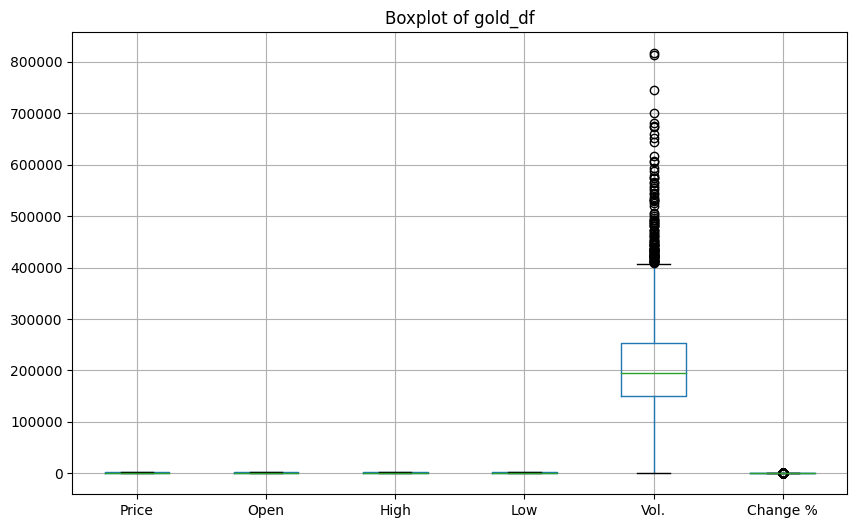

Overview of sp500_df:
            Date    Price     Open     High      Low  Vol.  Change %
0     07/29/2024  5472.73  5478.43  5486.93  5463.93   NaN      0.25
1     07/26/2024  5459.10  5433.67  5488.32  5430.70   NaN      1.11
2     07/25/2024  5399.22  5428.70  5491.59  5390.95   NaN     -0.51
3     07/24/2024  5427.13  5505.84  5508.04  5419.98   NaN     -2.31
4     07/23/2024  5555.74  5565.30  5585.34  5550.90   NaN     -0.16
...          ...      ...      ...      ...      ...   ...       ...
2907  01/08/2013  1457.20  1461.90  1461.90  1451.60   NaN     -0.32
2908  01/07/2013  1461.90  1466.50  1466.50  1456.60   NaN     -0.31
2909  01/04/2013  1466.50  1459.40  1467.90  1459.00   NaN      0.49
2910  01/03/2013  1459.40  1462.40  1465.50  1455.50   NaN     -0.21
2911  01/02/2013  1462.40  1426.20  1462.40  1426.20   NaN      2.54

[2912 rows x 7 columns]


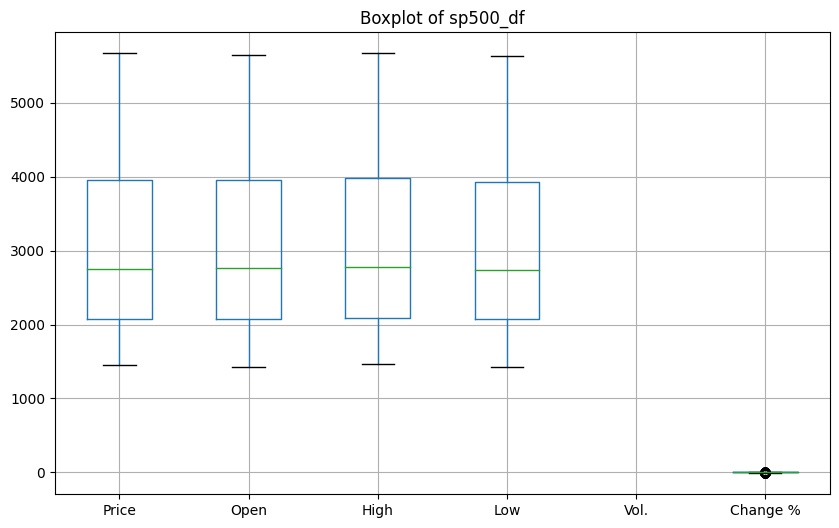

Overview of silver_df:
            Date   Price    Open    High     Low      Vol.  Change %
0     07/29/2024  27.715  28.260  28.332  27.457       NaN     -1.93
1     07/28/2024  28.260  28.065  28.280  28.050       NaN      0.86
2     07/26/2024  28.020  27.990  28.220  27.750   61460.0      0.16
3     07/25/2024  27.975  29.075  29.080  27.555  117210.0     -4.57
4     07/24/2024  29.316  29.420  29.630  29.065   54910.0     -0.05
...          ...     ...     ...     ...     ...       ...       ...
2981  01/08/2013  30.465  30.145  30.590  30.085   42570.0      1.27
2982  01/07/2013  30.082  30.235  30.475  29.860   35270.0      0.45
2983  01/04/2013  29.946  30.100  30.300  29.240   64250.0     -2.52
2984  01/03/2013  30.720  31.025  31.225  30.015   40790.0     -0.93
2985  01/02/2013  31.007  30.370  31.535  30.225   36530.0      2.58

[2986 rows x 7 columns]


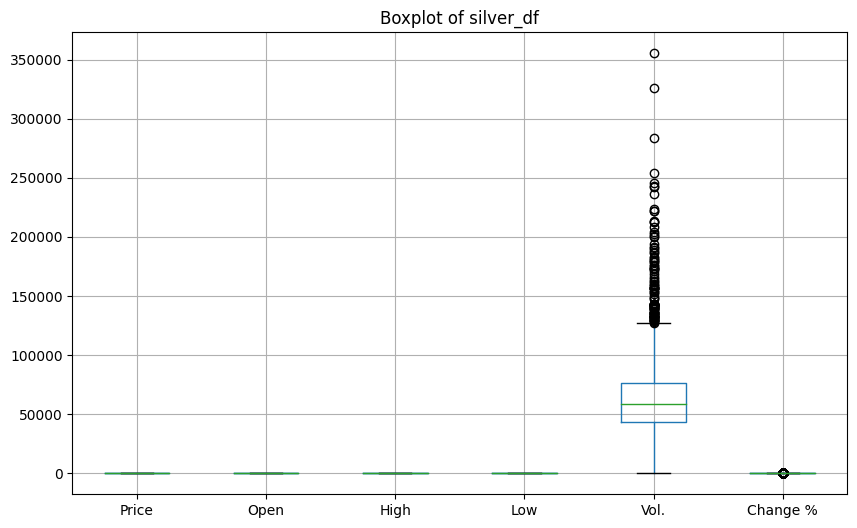

Overview of corn_df:
            Date   Price    Open    High     Low      Vol.  Change %
0     07/29/2024  410.90  407.12  411.12  405.60       NaN      0.22
1     07/26/2024  410.00  421.00  421.75  409.25  161570.0     -2.55
2     07/25/2024  420.75  417.25  423.50  416.25  155680.0      0.66
3     07/24/2024  418.00  416.50  423.75  414.50  166660.0      0.18
4     07/23/2024  417.25  413.75  422.50  411.75  175650.0      0.54
...          ...     ...     ...     ...     ...       ...       ...
2942  01/08/2013  688.75  685.50  693.50  683.25   39570.0      0.51
2943  01/07/2013  685.25  681.50  690.00  678.50   40490.0      0.66
2944  01/04/2013  680.75  690.50  694.00  680.25   36070.0     -1.48
2945  01/03/2013  691.00  693.75  697.00  687.75   24160.0     -0.36
2946  01/02/2013  693.50  707.25  709.00  690.50   25760.0     -0.96

[2947 rows x 7 columns]


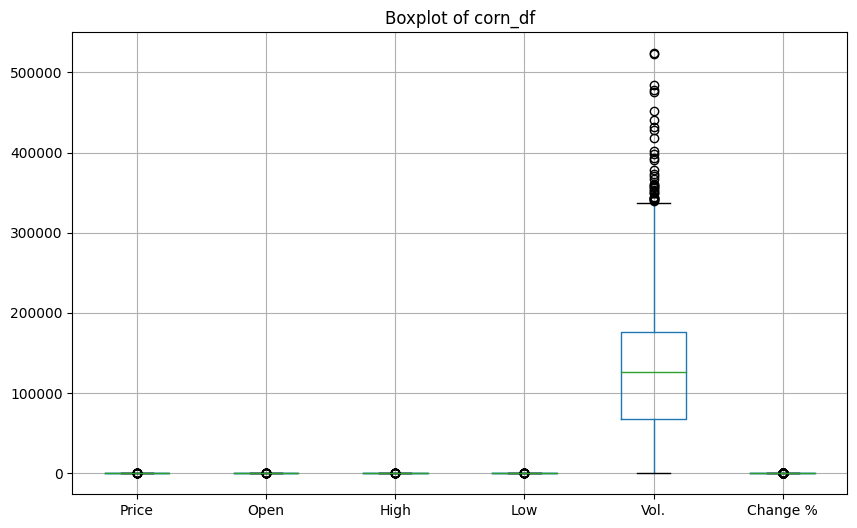

Overview of dollar_rate_df:
            Date   Price    Open    High     Low  Vol.  Change %
0     07/29/2024  104.66  104.37  104.67  104.14   NaN      0.27
1     07/28/2024  104.37  104.33  104.37  104.29   NaN      0.06
2     07/26/2024  104.32  104.36  104.45  104.21   NaN     -0.04
3     07/25/2024  104.36  104.38  104.46  104.08   NaN     -0.03
4     07/24/2024  104.39  104.48  104.56  104.12   NaN     -0.06
...          ...     ...     ...     ...     ...   ...       ...
3016  01/07/2013   80.26   80.46   80.68   80.11   NaN     -0.30
3017  01/04/2013   80.50   80.57   80.87   80.41   NaN      0.15
3018  01/03/2013   80.38   79.81   80.59   79.80   NaN      0.68
3019  01/02/2013   79.84   79.75   79.93   79.28   NaN      0.09
3020  01/01/2013   79.77   79.69   79.82   79.65   NaN      0.00

[3021 rows x 7 columns]


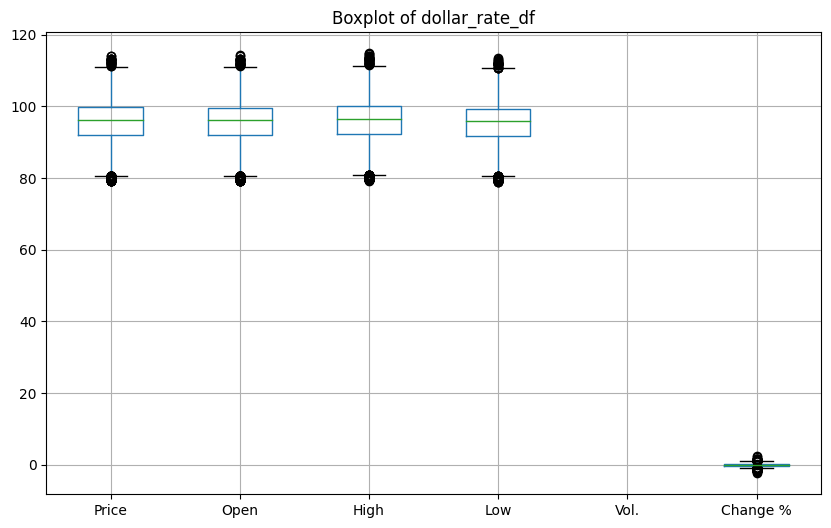

Overview of soybean_df:
            Date    Price     Open     High      Low     Vol.  Change %
0     07/29/2024  1028.25  1035.62  1035.88  1008.38      NaN     -0.93
1     07/28/2024  1037.88   1041.5   1041.5   1034.0      NaN     -0.40
2     07/26/2024   1042.0  1068.75  1075.75  1038.75  39480.0     -3.02
3     07/25/2024   1074.5  1060.75  1076.75  1054.25  29420.0      1.34
4     07/24/2024  1060.25  1069.75   1075.5   1059.0  23860.0     -1.07
...          ...      ...      ...      ...      ...      ...       ...
2965  01/07/2013  1390.63  1363.38  1392.63  1360.63      NaN      2.01
2966  01/06/2013  1363.25  1367.13  1367.25  1357.63      NaN     -0.18
2967  01/04/2013  1365.75  1391.38  1397.13  1356.13      NaN     -1.83
2968  01/03/2013  1391.25  1393.13  1395.63  1372.63      NaN     -0.13
2969  01/02/2013  1393.13  1432.63   1433.0  1386.38      NaN     -1.09

[2970 rows x 7 columns]


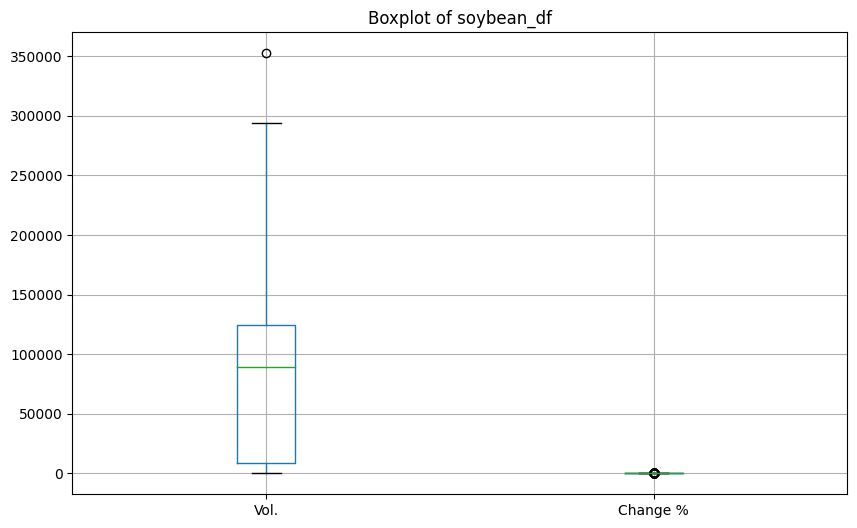

In [103]:
def replace_symbols(value):
    if isinstance(value, (int, float, complex)):
        return value
    if isinstance(value, str):
        if '%' in value:
            return float(value.replace('%', ''))
        elif 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif ',' in value:
            return float(value.replace(',', ''))
    return value

for df_name, df in dfs_dict.items():
    try:
        # Convert all columns except 'Date' using replace_symbols
        for col in df.columns:
            if col != 'Date':
                df[col] = df[col].apply(replace_symbols)

        # Display the DataFrame overview and boxplot
        print(f"Overview of {df_name}:")
        print(df)
        
        # Plot boxplots
        plt.figure(figsize=(10, 6))
        df.drop(columns='Date').boxplot()
        plt.title(f'Boxplot of {df_name}')
        plt.show()
    
    except Exception as e:
        print(f"Error with {df_name}: {e}")
        continue



Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


<Axes: >

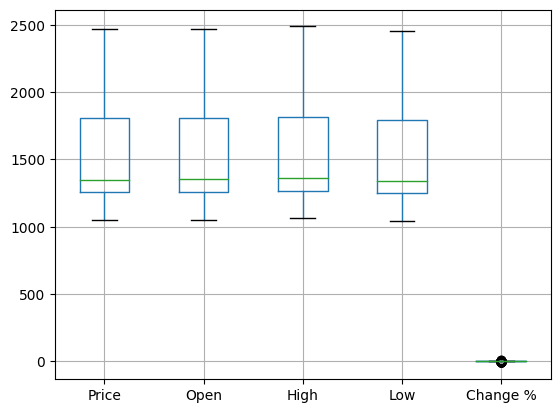

In [104]:
dfs_dict['gold_df']['Price'].dtype
print(dfs_dict['gold_df'].columns)
dfs_dict['gold_df'].drop(columns = ['Vol.']).boxplot()

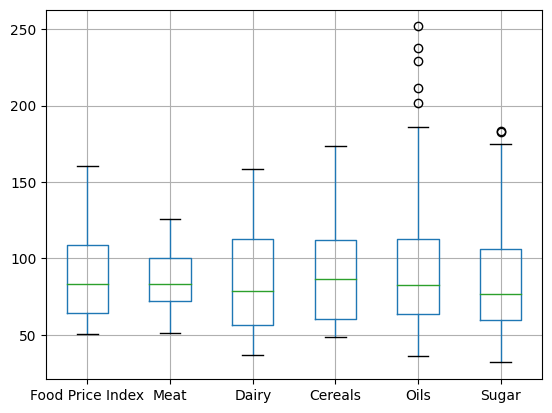

In [105]:
food_price_df.boxplot()
plt.show()

In [106]:
for df in dfs_dict.values():
    df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to include dataframe name as prefix
for name, df in dfs_dict.items():
    prefix = name.replace('_df', '')  # Remove '_df' from dataframe name
    df.rename(columns=lambda x: f"{prefix}_{x}" if x != 'Date' else x, inplace=True)

# Start with the first dataframe
merged_df = list(dfs_dict.values())[0]

# Iteratively merge remaining dataframes
for df in list(dfs_dict.values())[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer')

In [107]:
merged_df

,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Price,gold_Open,gold_High,...,dollar_rate_High,dollar_rate_Low,dollar_rate_Vol.,dollar_rate_Change %,soybean_Price,soybean_Open,soybean_High,soybean_Low,soybean_Vol.,soybean_Change %
0,2024-07-29,75.56,77.28,77.69,75.52,NaN,-2.21,2435.05,2443.30,2448.4,...,104.67,104.14,NaN,0.27,1028.25,1035.62,1035.88,1008.38,NaN,-0.93
1,2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14,2443.05,2433.55,2449.2,...,104.37,104.29,NaN,0.06,1037.88,1041.5,1041.5,1034.0,NaN,-0.40
2,2024-07-26,77.16,78.35,78.60,76.19,365120.0,-1.43,2427.90,2409.90,2436.7,...,104.45,104.21,NaN,-0.04,1042.0,1068.75,1075.75,1038.75,39480.0,-3.02
3,2024-07-25,78.28,77.50,78.47,76.04,457290.0,0.89,2399.90,2446.20,2448.4,...,104.46,104.08,NaN,-0.03,1074.5,1060.75,1076.75,1054.25,29420.0,1.34
4,2024-07-24,77.59,77.45,78.19,76.98,355970.0,0.82,2464.00,2458.10,2481.1,...,104.56,104.12,NaN,-0.06,1060.25,1069.75,1075.5,1059.0,23860.0,-1.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1440.88,1449.88,1449.88,1432.38,NaN,-0.86
3084,2013-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1481.38,1483.38,1484.88,1478.5,NaN,0.36
3085,2013-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1451.13,1446.38,1451.88,1446.13,NaN,0.73
3086,2013-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1386.25,1377.0,1387.13,1377.0,NaN,0.75


In [108]:
cleaned_df = merged_df.dropna(axis=1, how='all')
cleaned_df

,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Price,gold_Open,gold_High,...,dollar_rate_Open,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,soybean_Price,soybean_Open,soybean_High,soybean_Low,soybean_Vol.,soybean_Change %
0,2024-07-29,75.56,77.28,77.69,75.52,NaN,-2.21,2435.05,2443.30,2448.4,...,104.37,104.67,104.14,0.27,1028.25,1035.62,1035.88,1008.38,NaN,-0.93
1,2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14,2443.05,2433.55,2449.2,...,104.33,104.37,104.29,0.06,1037.88,1041.5,1041.5,1034.0,NaN,-0.40
2,2024-07-26,77.16,78.35,78.60,76.19,365120.0,-1.43,2427.90,2409.90,2436.7,...,104.36,104.45,104.21,-0.04,1042.0,1068.75,1075.75,1038.75,39480.0,-3.02
3,2024-07-25,78.28,77.50,78.47,76.04,457290.0,0.89,2399.90,2446.20,2448.4,...,104.38,104.46,104.08,-0.03,1074.5,1060.75,1076.75,1054.25,29420.0,1.34
4,2024-07-24,77.59,77.45,78.19,76.98,355970.0,0.82,2464.00,2458.10,2481.1,...,104.48,104.56,104.12,-0.06,1060.25,1069.75,1075.5,1059.0,23860.0,-1.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1440.88,1449.88,1449.88,1432.38,NaN,-0.86
3084,2013-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1481.38,1483.38,1484.88,1478.5,NaN,0.36
3085,2013-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1451.13,1446.38,1451.88,1446.13,NaN,0.73
3086,2013-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1386.25,1377.0,1387.13,1377.0,NaN,0.75


In [109]:
# Filling NaNs of Sundays (there are Nans on Sundays in all colums except of soybean prices)
sunday_nan_columns = [col for col in cleaned_df.columns if not col.startswith('soy')]
sunday_nan_columns.remove('Date')
cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
cleaned_df['is_holiday'] = 0
# Update 'is_holiday' to 1 where 'soybean_Price' is NaN
cleaned_df.loc[cleaned_df['soybean_Price'].isna(), 'is_holiday'] = 1
cleaned_df

C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\907674799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\907674799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['is_holiday'] = 0


,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Price,gold_Open,gold_High,...,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,soybean_Price,soybean_Open,soybean_High,soybean_Low,soybean_Vol.,soybean_Change %,is_holiday
0,2024-07-29,75.56,77.28,77.69,75.52,NaN,-2.21,2435.05,2443.30,2448.4,...,104.67,104.14,0.27,1028.25,1035.62,1035.88,1008.38,NaN,-0.93,0
1,2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14,2443.05,2433.55,2449.2,...,104.37,104.29,0.06,1037.88,1041.5,1041.5,1034.0,NaN,-0.40,0
2,2024-07-26,77.16,78.35,78.60,76.19,365120.0,-1.43,2427.90,2409.90,2436.7,...,104.45,104.21,-0.04,1042.0,1068.75,1075.75,1038.75,39480.0,-3.02,0
3,2024-07-25,78.28,77.50,78.47,76.04,457290.0,0.89,2399.90,2446.20,2448.4,...,104.46,104.08,-0.03,1074.5,1060.75,1076.75,1054.25,29420.0,1.34,0
4,2024-07-24,77.59,77.45,78.19,76.98,355970.0,0.82,2464.00,2458.10,2481.1,...,104.56,104.12,-0.06,1060.25,1069.75,1075.5,1059.0,23860.0,-1.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,2013-02-10,93.12,91.78,93.87,91.56,203870.0,1.42,1693.20,1686.50,1695.9,...,79.82,79.65,0.00,1440.88,1449.88,1449.88,1432.38,NaN,-0.86,0
3084,2013-02-03,93.12,91.78,93.87,91.56,203870.0,1.42,1693.20,1686.50,1695.9,...,79.82,79.65,0.00,1481.38,1483.38,1484.88,1478.5,NaN,0.36,0
3085,2013-01-27,93.12,91.78,93.87,91.56,203870.0,1.42,1693.20,1686.50,1695.9,...,79.82,79.65,0.00,1451.13,1446.38,1451.88,1446.13,NaN,0.73,0
3086,2013-01-13,93.12,91.78,93.87,91.56,203870.0,1.42,1693.20,1686.50,1695.9,...,79.82,79.65,0.00,1386.25,1377.0,1387.13,1377.0,NaN,0.75,0


In [110]:
print(cleaned_df)

           Date  crude_oil_Price  crude_oil_Open  crude_oil_High   
0    2024-07-29            75.56           77.28           77.69  \
1    2024-07-28            77.27           77.47           77.48   
2    2024-07-26            77.16           78.35           78.60   
3    2024-07-25            78.28           77.50           78.47   
4    2024-07-24            77.59           77.45           78.19   
...         ...              ...             ...             ...   
3083 2013-02-10            93.12           91.78           93.87   
3084 2013-02-03            93.12           91.78           93.87   
3085 2013-01-27            93.12           91.78           93.87   
3086 2013-01-13            93.12           91.78           93.87   
3087 2013-01-06            93.12           91.78           93.87   

      crude_oil_Low  crude_oil_Vol.  crude_oil_Change %  gold_Price   
0             75.52             NaN               -2.21     2435.05  \
1             77.22             NaN      

In [111]:
print(filtered_foodprice_df)

        Date  Food Price Index  Meat FP Index  Dairy FP Index   
276  2013-01             123.4          106.5           121.0  \
277  2013-02             123.3          107.6           123.8   
278  2013-03             122.9          108.0           128.0   
279  2013-04             122.9          108.7           140.8   
280  2013-05             122.1          105.5           140.0   
..       ...               ...            ...             ...   
409  2024-02             117.4          112.5           120.7   
410  2024-03             119.0          115.0           124.0   
411  2024-04             119.3          116.7           123.8   
412  2024-05             120.6          117.0           126.3   
413  2024-06             120.6          116.9           127.8   

     Cereals FP Index  Oils FP Index  Sugar FP Index  
276             145.2         124.28           116.8  
277             142.3         125.55           113.0  
278             139.9         122.38           114.3  

In [112]:
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])
filtered_foodprice_df['Date'] = pd.to_datetime(filtered_foodprice_df['Date'], format='%Y-%m')

cleaned_df['YearMonth'] = cleaned_df['Date'].dt.to_period('M')

# Extract year-month from monthly data
filtered_foodprice_df['YearMonth'] = filtered_foodprice_df['Date'].dt.to_period('M')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'], format='%Y-%m')
ppi_df['DATE'] = pd.to_datetime(ppi_df['DATE'], format='%Y-%m')

# Extract year-month from CPI and PPI data
cpi_df['YearMonth'] = cpi_df['DATE'].dt.to_period('M')
ppi_df['YearMonth'] = ppi_df['DATE'].dt.to_period('M')
cpi_df = cpi_df[['YearMonth', 'CPI']]
ppi_df = ppi_df[['YearMonth', 'PPI']]
filtered_foodprice_df.drop(columns='Date', inplace=True)

# Merge CPI and PPI data with all_data_df
all_data_df = pd.merge(cleaned_df, cpi_df, on='YearMonth', how='left')
all_data_df = pd.merge(all_data_df, ppi_df, on='YearMonth', how='left')
# Merge DataFrames on YearMonth
all_data_df = pd.merge(all_data_df, filtered_foodprice_df, on='YearMonth', how='left')

# Drop the temporary YearMonth column
all_data_df.drop(columns='YearMonth', inplace=True)


C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\1633660004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])
C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\1633660004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_foodprice_df['Date'] = pd.to_datetime(filtered_foodprice_df['Date'], format='%Y-%m')
C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\1633660004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [113]:
all_data_df

,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Price,gold_Open,gold_High,...,soybean_Change %,is_holiday,CPI,PPI,Food Price Index,Meat FP Index,Dairy FP Index,Cereals FP Index,Oils FP Index,Sugar FP Index
0,2024-07-29,75.56,77.28,77.69,75.52,NaN,-2.21,2435.05,2443.30,2448.4,...,-0.93,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14,2443.05,2433.55,2449.2,...,-0.40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-07-26,77.16,78.35,78.60,76.19,365120.0,-1.43,2427.90,2409.90,2436.7,...,-3.02,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-07-25,78.28,77.50,78.47,76.04,457290.0,0.89,2399.90,2446.20,2448.4,...,1.34,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-07-24,77.59,77.45,78.19,76.98,355970.0,0.82,2464.00,2458.10,2481.1,...,-1.07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,2013-02-10,93.12,91.78,93.87,91.56,203870.0,1.42,1693.20,1686.50,1695.9,...,-0.86,0,232.937,204.3,123.3,107.6,123.8,142.3,125.55,113.0
3084,2013-02-03,93.12,91.78,93.87,91.56,203870.0,1.42,1693.20,1686.50,1695.9,...,0.36,0,232.937,204.3,123.3,107.6,123.8,142.3,125.55,113.0
3085,2013-01-27,93.12,91.78,93.87,91.56,203870.0,1.42,1693.20,1686.50,1695.9,...,0.73,0,231.679,202.5,123.4,106.5,121.0,145.2,124.28,116.8
3086,2013-01-13,93.12,91.78,93.87,91.56,203870.0,1.42,1693.20,1686.50,1695.9,...,0.75,0,231.679,202.5,123.4,106.5,121.0,145.2,124.28,116.8


In [115]:
all_data_df.columns

Index(['Date', 'crude_oil_Price', 'crude_oil_Open', 'crude_oil_High',
       'crude_oil_Low', 'crude_oil_Vol.', 'crude_oil_Change %', 'gold_Price',
       'gold_Open', 'gold_High', 'gold_Low', 'gold_Vol.', 'gold_Change %',
       'sp500_Price', 'sp500_Open', 'sp500_High', 'sp500_Low',
       'sp500_Change %', 'silver_Price', 'silver_Open', 'silver_High',
       'silver_Low', 'silver_Vol.', 'silver_Change %', 'corn_Price',
       'corn_Open', 'corn_High', 'corn_Low', 'corn_Vol.', 'corn_Change %',
       'dollar_rate_Price', 'dollar_rate_Open', 'dollar_rate_High',
       'dollar_rate_Low', 'dollar_rate_Change %', 'soybean_Price',
       'soybean_Open', 'soybean_High', 'soybean_Low', 'soybean_Vol.',
       'soybean_Change %', 'is_holiday', 'CPI', 'PPI', 'Food Price Index',
       'Meat FP Index', 'Dairy FP Index', 'Cereals FP Index', 'Oils FP Index',
       'Sugar FP Index'],
      dtype='object')

In [117]:
all_data_df['Date'] = pd.to_datetime(all_data_df['Date'])

# Set 'date' as the index
all_data_df.set_index('Date', inplace=True)

# Sort the DataFrame by date (if not already sorted)
data = all_data_df.sort_index()

KeyError: 'Date'

In [130]:
data = all_data_df.sort_index(ascending=False)

In [131]:
gold_prices = all_data_df['gold_Price']
gold_prices

Date
2024-07-29    2435.05
2024-07-28    2443.05
2024-07-26    2427.90
2024-07-25    2399.90
2024-07-24    2464.00
               ...   
2013-02-10    1693.20
2013-02-03    1693.20
2013-01-27    1693.20
2013-01-13    1693.20
2013-01-06    1693.20
Name: gold_Price, Length: 3088, dtype: float64

C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and 

Mean Squared Error: 107958.01671481098


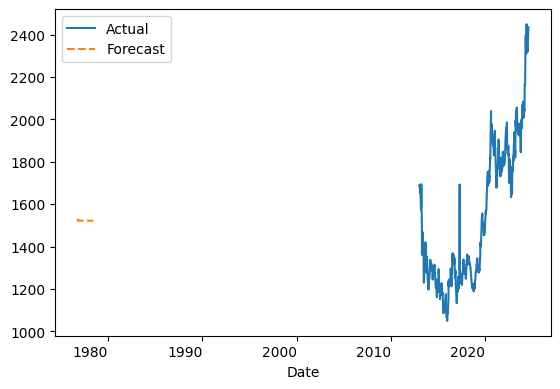

In [132]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Assuming 'data' is a DataFrame with 'Date' and 'GoldPrice' columns
gold_prices = all_data_df['gold_Price']

# Split data into training and testing
# train_size = int(len(gold_prices) * 0.8)
# train, test = gold_prices[:train_size], gold_prices[train_size:]
y_train, y_test = train_test_split(gold_prices, test_size=0.2, random_state=42)



# Fit ARIMA model
model = ARIMA(y_train, order=(5,1,2))  # (p,d,q) order
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(y_test))
mse = mean_squared_error(y_test, forecast)
print(f'Mean Squared Error: {mse}')

# Plotting the results
y_test.plot(label='Actual')
forecast.plot(label='Forecast', linestyle='--')
plt.legend()
plt.show()

In [133]:
forecast

2470    1531.259058
2471    1528.972401
2472    1522.782539
2473    1525.305001
2474    1522.656196
           ...     
3083    1522.467415
3084    1522.494753
3085    1522.467416
3086    1522.494753
3087    1522.467416
Name: predicted_mean, Length: 618, dtype: float64

In [ ]:
all_data_df.to_csv('all_data.csv', index=False)

In [ ]:
all_data_df['gold_price_in_7_days'] = all_data_df['gold_Price'].shift(-7)
all_data_df['gold_price_in_30_days'] = all_data_df['gold_Price'].shift(-30)

In [ ]:
len(all_data_df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_clean = all_data_df.loc[:, ~all_data_df.columns.str.contains(r'corn|soybean|Dairy|Sugar|Meat|Food|Cereals|Oils|CPI|PPI')]
df_clean = df_clean.dropna()



In [ ]:
all_data_df['gold_price_shifted'] = all_data_df['gold_Price'].shift(-7)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_clean.loc[:, ~df_clean.columns.str.contains('gold')], df_clean['gold_price_in_7_days'], test_size=0.2, random_state=42)

df_clean.to_csv('cleaned_data.csv', index=False)


In [ ]:

data_len = len(df_clean)
features = df_clean.loc[:, ~df_clean.columns.str.contains('gold')]
gold = df_clean['gold_price_in_7_days']
X_train = features.iloc[:int(data_len*0.8)]
X_test = features.iloc[int(data_len*0.8):]
y_train = gold.iloc[:int(data_len*0.8)]
y_test = gold.iloc[int(data_len*0.8):]

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
print(y_pred)

In [ ]:
len(df_clean.columns)

In [ ]:
import numpy as np

In [ ]:
np.array([model.feature_names_in_, model.coef_]).T